In [16]:
try : 
    import pydsd
except : 
    !conda install -c conda-forge pydsd  -y  --quiet 
    import pydsd
    import pytmatrix
    
try : 
    import matplotlib.pyplot as plt
except :
    !pip install matplotlib
    import matplotlib.pyplot as plt
    
try : 
    import nextcloud_client
except :
    !pip install pyncclient --quiet   
    import nextcloud_client

import requests
from urllib.request import urlopen
import re

exec(open('./connect_cloudUGA.py').read())
cloud = connect_cloudUGA()
#list_f=cloud.list('ENSE3/DONNEES/DISDRO-OSUG-B/')
list_f=cloud.list('ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/')
files=[list_f[i].path for i in range(len(list_f))]
for i in range(len(files)) :
    print(i ,files[i])

········
0 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_2-2021-semestre1.dat
1 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_2-2021-semestre2.dat
2 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_2-2022-semestre1.dat
3 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_2-2022-semestre2.dat
4 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_Spectre_2-2021-semestre1.dat
5 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_Spectre_2-2021-semestre2.dat
6 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_Spectre_2-2022-semestre1.dat
7 /ENSE3/DONNEES/DISDRO-OTT-PARSIVEL-CHAMROUSSE/SEMESTRE/OHMCV_fr_Chamrousse_Disdro_Parsivel_Spectre_2-2022-semestre2.dat


In [21]:
import requests
import numpy as np
from  pydsd.utility.filter import filter_spectrum_with_parsivel_matrix, filter_nd_on_dropsize


exec(open('./DSD_utils/ParsivelReader_Campbell.py').read())

Parsi_filename = return_long_url_file (cloud, files[2])
Spect_filename = return_long_url_file (cloud, files[6])

resampling='5min'
resampling=None

dsd = read_parsivel_Campbell(Parsi_filename,
                                   Spect_filename,
#                                    start="2021-06-01 00:00:00",
#                                    stop="2021-06-30 23:59:00",
#                                    v_filter=True,
                                    resampling=resampling
)

Parsivel2 spectrum raw file in process : 
Parsivel2 file in process : 
https://cloud.univ-grenoble-alpes.fr/s/4RFLHaMYjbCzMJ7/download/OHMCV_fr_Chamrousse_Disdro_Parsivel_2-2022-semestre1.dat
Resampling =  0 s
div_sampling =  1

DSD sampling available from 2022-01-05 00:05:00 to 2022-07-01 00:21:00


Event  0 :  2022-01-05 00:05:00  to  2022-01-06 02:52:00  : rain acc =  42.65  ,Nd =  1121551  ( 0 , 1199 )
Event  1 :  2022-01-07 14:01:00  to  2022-01-08 12:19:00  : rain acc =  28.3  ,Nd =  837928  ( 1202 , 2086 )
Event  2 :  2022-01-08 17:24:00  to  2022-01-10 01:11:00  : rain acc =  41.59  ,Nd =  947335  ( 2086 , 3432 )
Event  3 :  2022-01-19 20:52:00  to  2022-01-19 23:03:00  : rain acc =  2.57  ,Nd =  43488  ( 3435 , 3567 )
Event  4 :  2022-01-20 17:51:00  to  2022-01-20 19:13:00  : rain acc =  0.04  ,Nd =  1812  ( 3574 , 3583 )
Event  5 :  2022-01-31 11:02:00  to  2022-02-01 06:12:00  : rain acc =  17.53  ,Nd =  395897  ( 3583 , 4125 )
Event  6 :  2022-02-01 17:28:00  to  2022-02-02 06:00:00  : rain acc =  7.81  ,Nd =  331115  ( 4130 , 4631 )
Event  7 :  2022-02-04 19:33:00  to  2022-02-04 21:37:00  : rain acc =  0.14  ,Nd =  7180  ( 4631 , 4661 )
Event  8 :  2022-02-06 17:54:00  to  2022-02-07 12:34:00  : rain acc =  27.53  ,Nd =  693951  ( 4661 , 5465 )
Event  9 :  2022-02-11

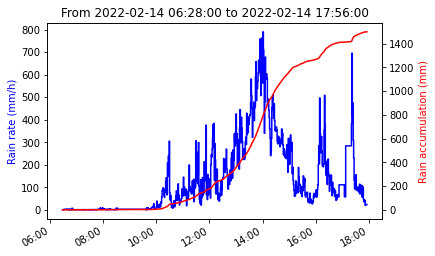

In [27]:
exec(open('./DSD_utils/func_utils.py').read())
exec(open('./DSD_utils/other_plots.py').read())


events = get_events(dsd,sep_event=10800,min_drops=1000,min_acc=0.1)
'''
get_events(dsd,sep_event=10800,min_drops=None,min_acc=None)
    extract Start and stop event date -  sep_event is the time with no rain separating 2 events 
    #Data split in rain event could be done over
        - 2 events are plit by a dry period of time (sep_event by default is set to 3h) 
        - a minimum number drops (min_drops) could be set to considere a rainy period as a event (default None)
        - a minimum of rain acculalation (min_acc) could be set to considere a rainy period as a event (default None)
        - if min_drops is set min_acc is not used
    In ./DSD_utils/func_utils.py  
''' 

starts=[]
for i in list(zip(*events))[0] : 
    starts.append(np.where(dsd.time["data"] == i )[0][0])

stops=[]
for i in list(zip(*events))[1] : 
    stops.append(np.where(dsd.time["data"] == i )[0][0])
    
acc=[]
for i in range(len(starts)) :
    acc.append(get_rain_accumulation (dsd, starts[i], stops[i]))

    
max_ev_start=starts[acc.index(np.nanmax(acc))]
max_ev_stop=stops[acc.index(np.nanmax(acc))]

print("Event n°",acc.index(np.nanmax(acc))," : max rain accumulation over the period : from ",
      pd.to_datetime(dsd.time["data"][max_ev_start], unit='s'),
      " to ",
      pd.to_datetime(dsd.time["data"][max_ev_stop], unit='s'),
      " : ",
      round(np.nanmax(acc),2),
      "mm")

while True:
    try:
        ev = int(input("Event to traite : "))
        if ev not in range(len(events)) : 
            print("This is not a valid event number.")
            continue
    except ValueError:
        print("This is not a valid event number.")
        continue
    else:
        break

ind_start=starts[ev]
ind_stop=stops[ev]+1

new_dsd=extract_subset_dsd(dsd,range(ind_start,ind_stop))
'''
extract_subset_dsd 
    extracts a subset of the DSD dataset over a period between start_time and stop_time
     In ./DSD_utils/func_utils.py 
'''

print('rain_rate = ',str(round(new_dsd.rain_rate["data"].sum()*np.mean(np.diff(new_dsd.time["data"][0:4]))/3600,2))+" mm")

#filter_spectrum_with_parsivel_matrix(new_dsd,over_fall_speed=0.5,under_fall_speed=0.5,replace=True,maintain_smallest=False)
""" 
filter_spectrum_with_parsivel_matrix
    Filter a drop spectrum using fall speed matrix for Parsivels.  This requires that velocity is set on the object
    for both raw spectra and calculated terminal fall speed. If terminal fall speed is not available, this can be calculated
    using pydsd.
    Parameters
    ----------
    over_fall_speed: float, default 0.5
        Filter out drops more than this factor of terminal fall speed.
    under_fall_speed: float, default 0.5
        Filter out drops more than this factor under terminal fall speed.
    maintain_smallest: boolean, default False
        For D<1, set V<2.5 bins all to positive to make sure small drops aren't dropped in PCM matrix. 
    Returns
    -------
    filtered_spectrum_data_array: np.ndarray
        Filtered Drop Spectrum Array
        
             In ./DSD_utils/func_utils.py 
"""

filter_nd_on_dropsize(new_dsd, drop_min=None, drop_max=7, replace=True)
""" 
filter_nd_on_dropsize
    Filter Nd field based on a min and/or max dropsize.
    
    Parameters
    ----------
    dsd: `DropSizeDistribution` object
        DSD object to base filtering on
    drop_min: float
        Filter drops under drop_min (mm) in size.
    drop_max: float
        Filter drops larger than drop_max (mm) in size.
    replace: boolean
        Whether to overwrite the Nd in fields. If replacing, no value is returned.

    Returns
    -------
    Nd: dictionary
    Updated Nd dictionary. Data and a history field.
        
     In ./DSD_utils/func_utils.py 
"""
new_dsd.calculate_dsd_from_spectrum(effective_sampling_area=None, replace=True)
"""
calculate_dsd_from_spectrum

    Calculate N(D) from the drop spectrum based on the effective sampling area.
    Updates the entry for ND in fields.
    Requires that drop_spectrum be present in fields, and that the dsd has spectrum_fall_velocity defined.

    Parameters
    ----------
    effective_sampling_area: function 
        Function that returns the effective sampling area as a function of diameter. Optionally
        a array with effective sampling area matched to diameter dimension can be provided as an array.
        None means calculate effective sampling area for Parsivels : 180 * (30 - 0.5 * diameter)
    replace: boolean
        Whether to replace Nd with the newly calculated one. If true, no return value to save memory.
"""
new_dsd.calculate_RR()
"""
calculate_RR
    Calculate instantaneous rain rate.
        This calculates instantaneous rain rate based on the flux of water.
"""          
print('fields[\"rain_rate\"] = ' ,str(round(new_dsd.fields["rain_rate"]["data"].sum()*np.mean(np.diff(new_dsd.time["data"][0:4]))/3600,2))+" mm")

ax=hyetogram(new_dsd)


In [13]:
#Pour connaitre toutes les fonctions et variables de la structure dsd:
print("fonctions et variables")
print(dir(dsd))
# Pour connaitre les champs de la structure dsd:
print("\n","champs de la structure dsd : dsd.fields[\"champs\"]")
print(dsd.fields.keys())

fonctions et variables
['Nd', 'Z', '_DropSizeDistribution__get_last_nonzero', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_calc_mth_moment', '_calculate_D0', '_calculate_exponential_params', '_estimate_mu', '_idb', '_mmultiply', '_mu_cost', '_setup_empty_fields', '_setup_scattering', 'air_density', 'bin_edges', 'calculate_RR', 'calculate_R_Kdp_relationship', 'calculate_R_Zdr_Kdp_relationship', 'calculate_R_Zh_Kdp_relationship', 'calculate_R_Zh_Zdr_relationship', 'calculate_R_Zh_relationship', 'calculate_dsd_from_spectrum', 'calculate_dsd_parameterization', 'calculate_fall_speed', 'calculate_radar_parameters', 'config', 'diameter', 'effective_sampling_area', 'fields', 'info'

fields["rain_rate"] =  4.14 mm


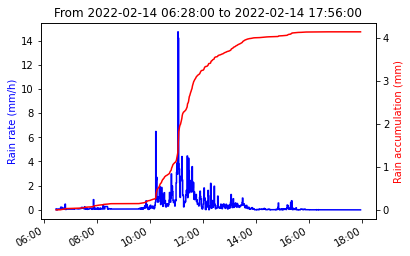

In [14]:
new_dsd.calculate_dsd_from_spectrum(effective_sampling_area=parsivel_sampling_area_epfl_2017, replace=True)
new_dsd.calculate_RR()
ax=hyetogram(new_dsd)
print('fields[\"rain_rate\"] = ' ,str(round(new_dsd.fields["rain_rate"]["data"].sum()*np.mean(np.diff(new_dsd.time["data"][0:4]))/3600,2))+" mm")

fields["rain_rate"] =  3.87 mm


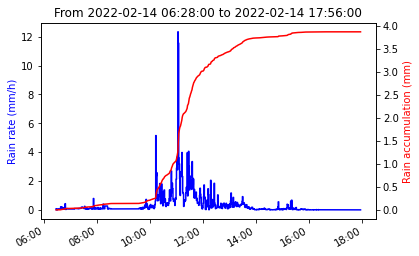

In [15]:
new_dsd.calculate_dsd_from_spectrum(effective_sampling_area=5400, replace=True)
new_dsd.calculate_RR()
ax=hyetogram(new_dsd)
print('fields[\"rain_rate\"] = ' ,str(round(new_dsd.fields["rain_rate"]["data"].sum()*np.mean(np.diff(new_dsd.time["data"][0:4]))/3600,2))+" mm")

<string>:129: RuntimeWarning: divide by zero encountered in log10


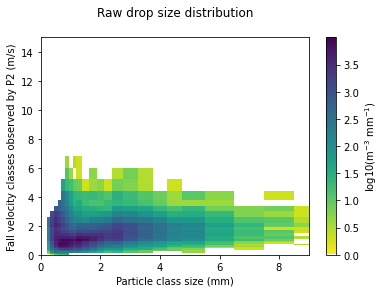

In [28]:
fig, ax = plot_drop_spectrum (new_dsd,
                            xlabel='Particle class size (mm)',
                            ylabel='Fall velocity classes observed by P2 (m/s)',
                            title='Raw drop size distribution\n',#+ str_start+' to '+str_stop,
                            colbarlabel='log10(m$^{-3}$ mm$^{-1}$)',
                            xlim=(0,9),
                            ylim=(0,15))